In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Linear regression - dummy variables

In [3]:
df = pd.DataFrame({
    'years_of_education': [5, 7, 8, 9 ,10 ,11 ,12 ,13, 5, 7, 8, 9, 10, 11, 12 ,13],
    'gender':['woman','woman','woman','woman','woman','woman','woman','woman', 'man','man','man','man','man','man','man','man'],
    'money':[150, 175, 180, 195, 225, 230, 235, 245, 100, 120, 130, 150 ,170 ,180 ,190 ,200]}
)

df

,years_of_education,gender,money
0,5,woman,150
1,7,woman,175
2,8,woman,180
3,9,woman,195
4,10,woman,225
5,11,woman,230
6,12,woman,235
7,13,woman,245
8,5,man,100
9,7,man,120


In [4]:
X = df[['years_of_education']]
y = df['money']

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
model1=LinearRegression()

In [7]:
model1.fit(X,y)

LinearRegression()

In [8]:
model1.coef_

array([12.95112782])

In [9]:
model1.intercept_

58.27067669172931

In [69]:
X = df[['years_of_education']]
y = df['money']

c:\users\raian\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


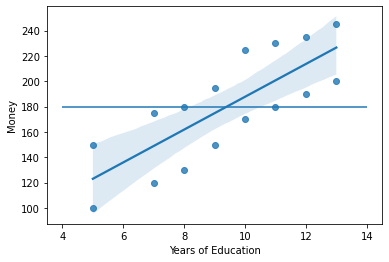

In [14]:
sns.regplot(X, y)
plt.xlabel('Years of Education')
plt.ylabel('Money')

plt.hlines(y.mean(),4,14)

In [25]:
X = df[['years_of_education','gender']]
y = df['money']

In [76]:
X

,years_of_education,gender
0,5,woman
1,7,woman
2,8,woman
3,9,woman
4,10,woman
5,11,woman
6,12,woman
7,13,woman
8,5,man
9,7,man


In [77]:
# model.fit will throw an error
model.fit(X, y)

ValueError: could not convert string to float: 'woman'

In [53]:
X=pd.get_dummies(df[['years_of_education','gender']], drop_first=True)

In [44]:
pd.concat([X, y], axis=1).corr()

,years_of_education,gender_man,gender_woman,money
years_of_education,1.000000,0.000000,0.000000,0.788313
gender_man,0.000000,1.000000,-1.000000,-0.601827
gender_woman,0.000000,-1.000000,1.000000,0.601827
money,0.788313,-0.601827,0.601827,1.000000


In [55]:
model.fit(X, y)

LinearRegression()

In [56]:
X

,years_of_education,gender_man
0,5,0
1,7,0
2,8,0
3,9,0
4,10,0
5,11,0
6,12,0
7,13,0
8,5,1
9,7,1


In [57]:
model.score(X, y)

0.9836337114040397

In [58]:
model.intercept_

82.95817669172932

In [59]:
model.coef_

array([ 12.95112782, -49.375     ])

Interpretation of the coefficient of a dummy variable.

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 $$

$\beta_0 = 33.6$

$\beta_1 = 12.95$ 

$x_1 =$ years_of_education (so for each year of education, you increase 12.95 in money)

$\beta_2 = 49.4$ 

$x_2 = $ gender_woman - that is, 1 if is woman, 0 if not.

The equation:
    
$ \text{money} = 33.6 + 12.95 \times \text{years_of_education} + 49.4 \times \text{gender_woman} $

for the case of <span style='color:blue'> <b>women</b> </span>: 

$ \text{money} = 33.6 + 12.95 \times \text{years_of_education} + 49.4 \times \text{1} $ <br>
$ \text{money} = 33.6 + 49.4 + 12.95 \times \text{years_of_education}  $

for the case of <span style='color:red'> <b>men</b> </span>:

$ \text{money} = 33.6 + 12.95 \times \text{years_of_education} + 49.4 \times 0 $<br>
$ \text{money} = 33.6 + 12.95 \times \text{years_of_education} $

So, the $\beta$ coefficient for dummy variables means that - fixing all other variables (that is, for the same level of education), women has an average of 49.4 intercept increase in money.

c:\users\raian\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


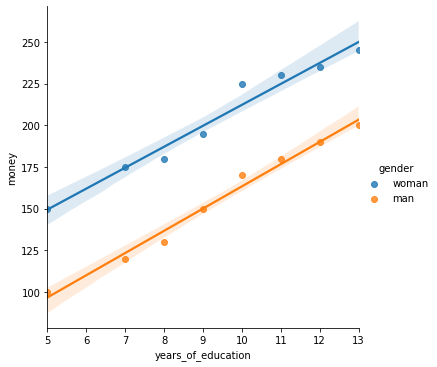

In [91]:
sns.lmplot('years_of_education','money', data=df, hue='gender')